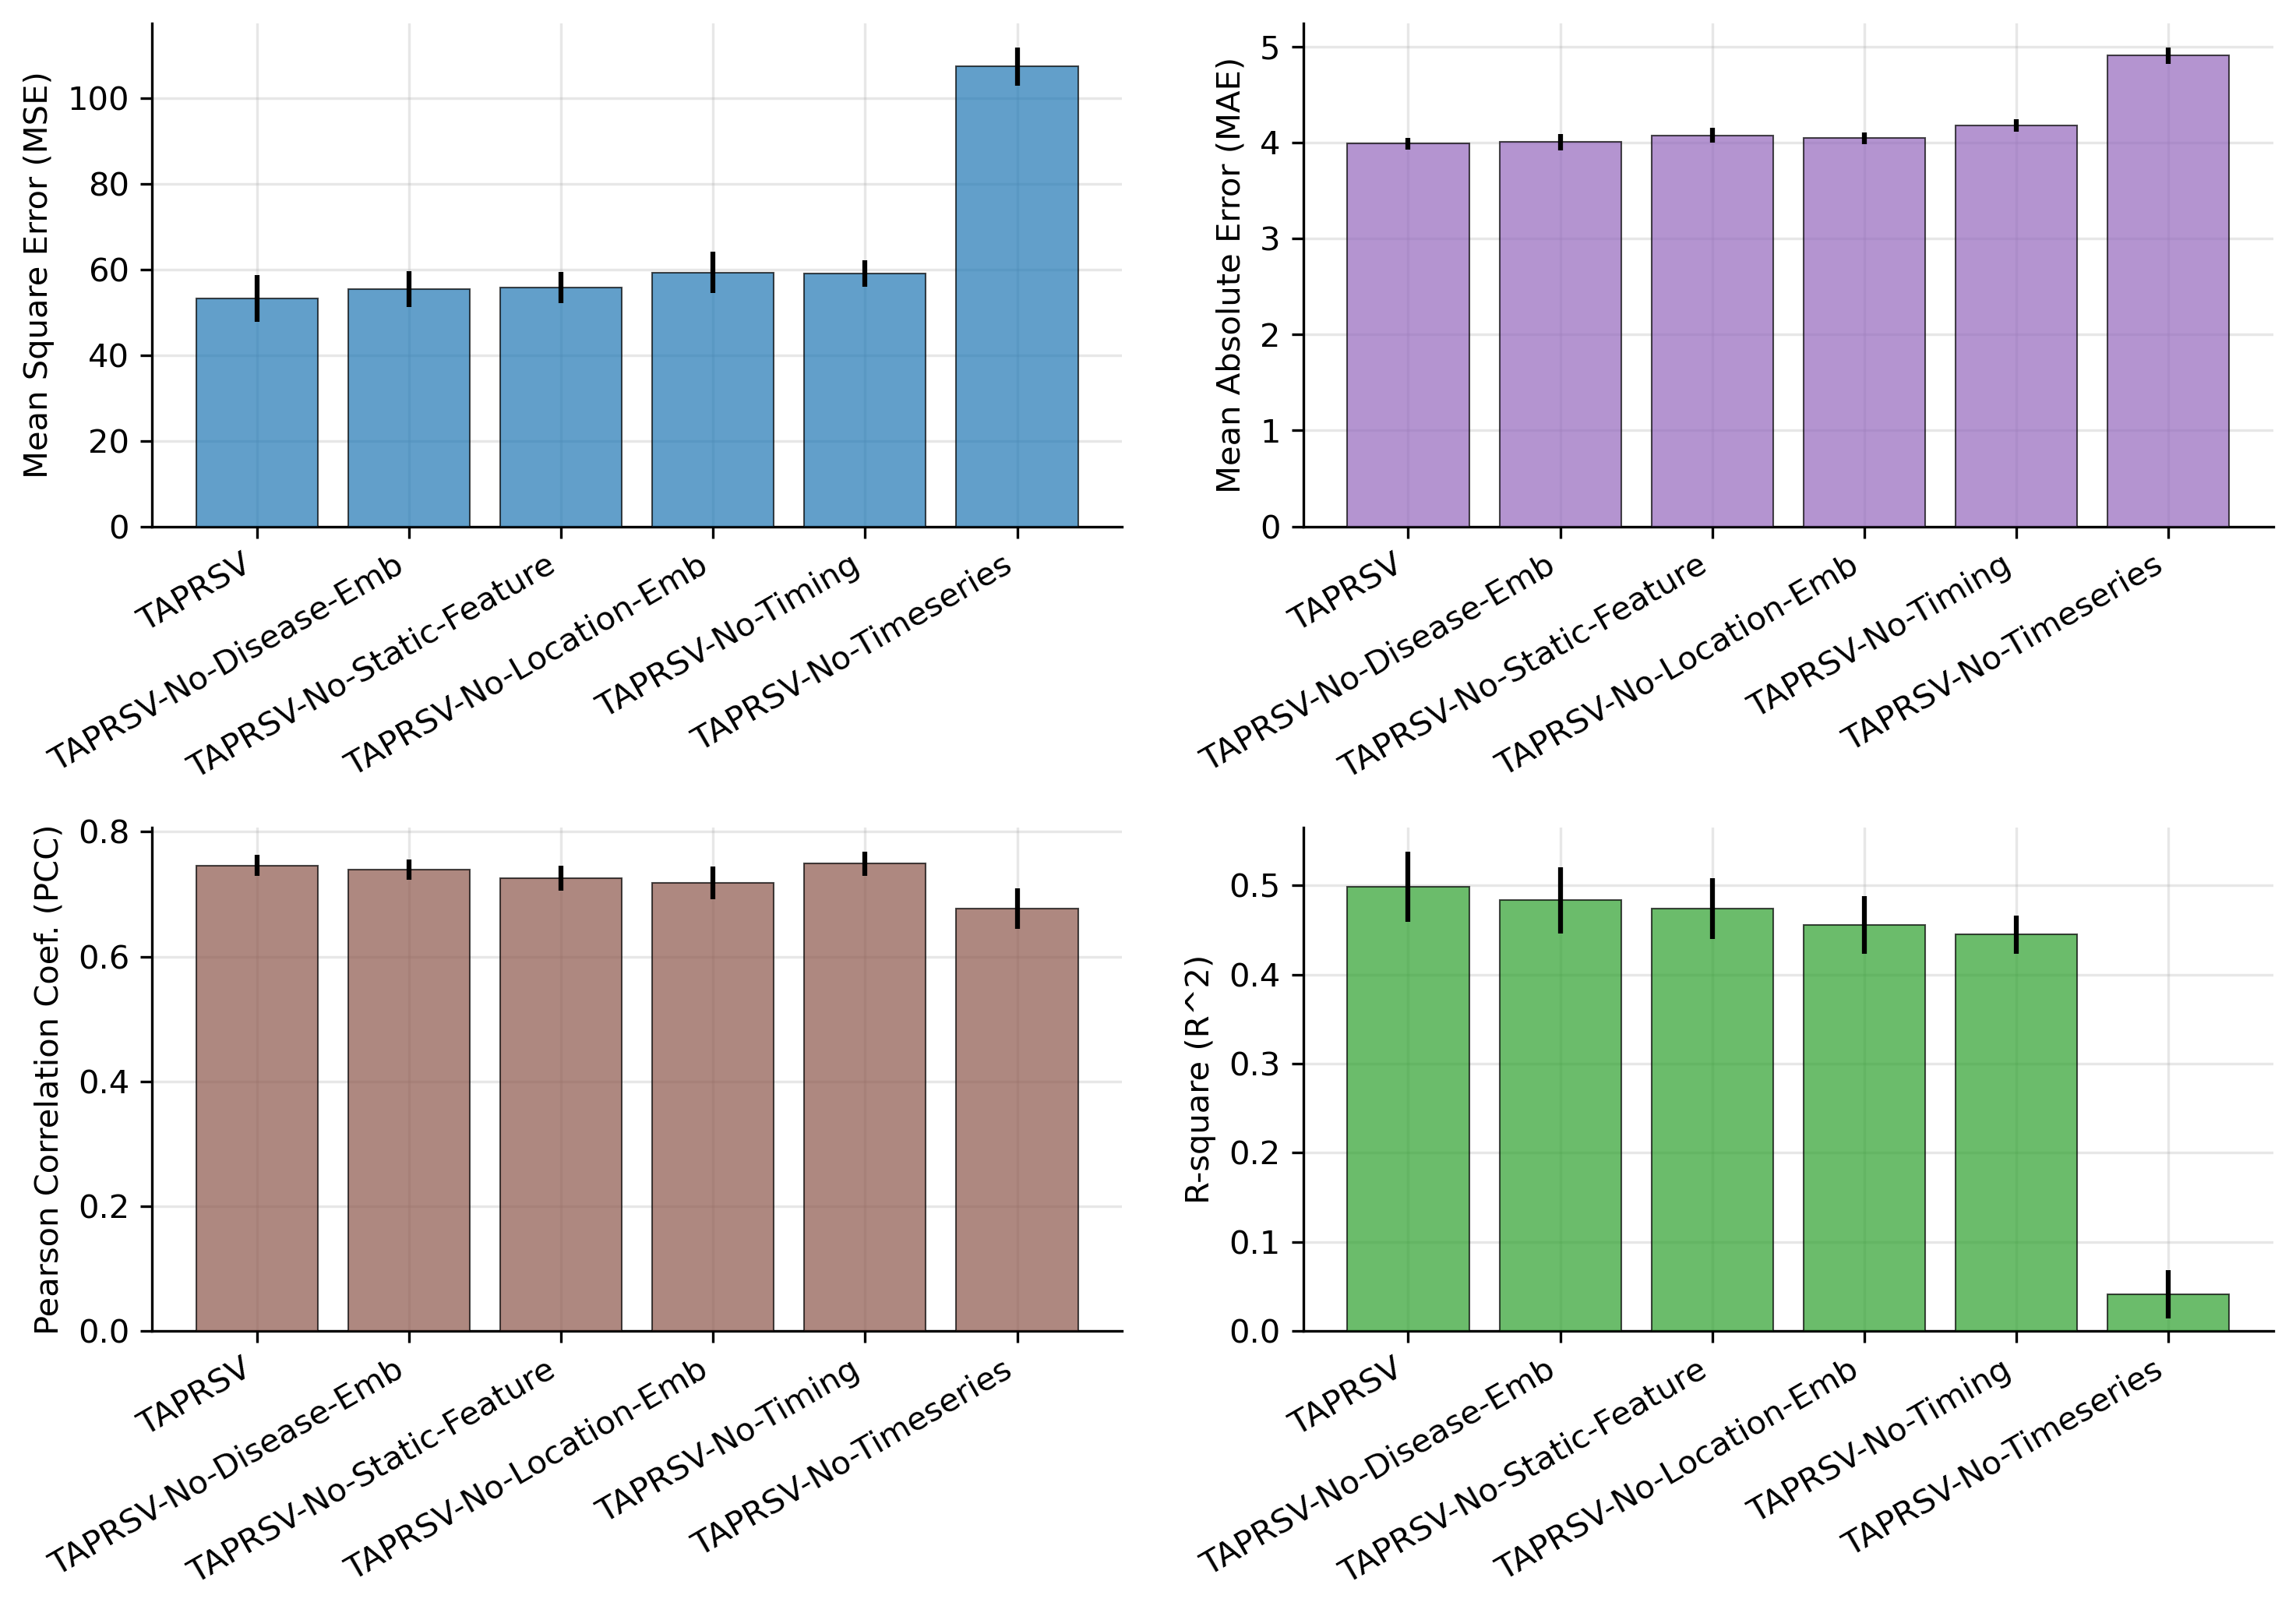

In [15]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

root = "D:\OneDrive - University of Edinburgh\paper\Spatio-temporal RSV\TAP-RSV 2\RSV\logs\\results-exp3\\"
files = [
    'TAPRSV.log',
    'TAPRSV-No-Disease-Emb.log',
 'TAPRSV-No-Static-Feature.log',
'TAPRSV-No-Location-Emb.log',
'TAPRSV-No-Timing.log',
'TAPRSV-No-Timeseries.log',
]
metric_names = ["Mean Square Error (MSE)", "Mean Absolute Error (MAE)", \
                "Pearson Correlation Coef. (PCC)", "R-square (R^2)"]

colors=["tab:blue", "tab:purple", "tab:brown", "tab:green"]

# store the results of one model in to model = []
# > model = [dict1, dict2, ...]
# > models = [model1, model2, ...]

# load all dicts
models = []
for file_name in files:
    file_path = os.path.join(root, file_name)
    models.append([json.loads(item[:-1].replace("'", '"')) for item in open(file_path, "r").readlines()[::2]])

    
fig = plt.figure(figsize=(10, 7), dpi=300)
# get one value and the error bar from one file
for idx, m in enumerate(["mse", "mae", "pcc", "rsquare"]):
    mean_curves = []
    std_curves = []
    for idx2, model in enumerate(models):
        metric = []
        for item in model:
            if m in item:
                metric.append(item[m])
            else:
                metric.append(item[f"test_{m}_loss"])
        mean_curves.append(np.mean(metric))
        std_curves.append(np.std(metric))
    
    ax = plt.subplot(2, 2, idx+1)
    plt.bar(np.arange(6), mean_curves, yerr=std_curves, label=files[idx][:-4], \
            linewidth=0.5, edgecolor='black', color=colors[idx], alpha=0.7, zorder=3)
    plt.xticks(np.arange(6), [item[:-4] for item in files], rotation=30, ha="right")
    plt.ylabel(metric_names[idx])
    ax.grid(alpha=.3,zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("../fig/bar.png", bbox_inches='tight', dpi=300)